Sidharth Dhawan | 102218069 | BS3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris.data', header=None, names=column_names)



X = iris_df.drop('species', axis=1)
y = iris_df['species']



label_binarizer = LabelBinarizer()
y_binary = label_binarizer.fit_transform(y)


X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)


models = []

for class_index in range(y_train_bin.shape[1]):
    class_name = label_binarizer.classes_[class_index]
    print(f"Training classifier for class: {class_name}")
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train_bin[:, class_index])
    models.append(classifier)



predicted_probabilities = []

for classifier in models:
    class_proba = classifier.predict_proba(X_test)[:, 1] 
    predicted_probabilities.append(class_proba)

predicted_probabilities = np.array(predicted_probabilities).T



predicted_class_indices = np.argmax(predicted_probabilities, axis=1)
predicted_classes = label_binarizer.classes_[predicted_class_indices]


true_classes = label_binarizer.inverse_transform(y_test_bin)


print("Accuracy:", accuracy_score(true_classes, predicted_classes))
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes))


Training classifier for class Iris-setosa
Training classifier for class Iris-versicolor
Training classifier for class Iris-virginica
Accuracy: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



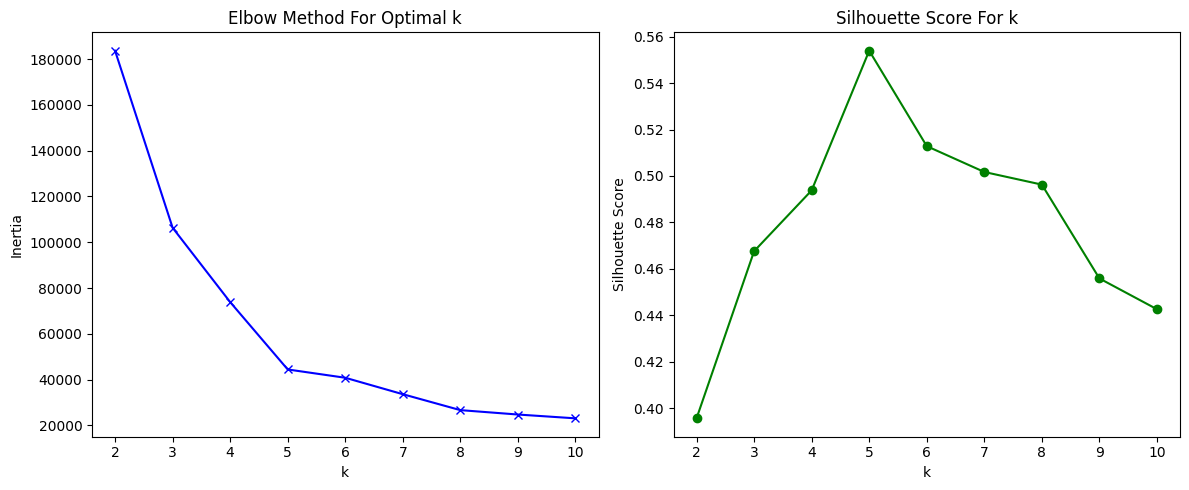

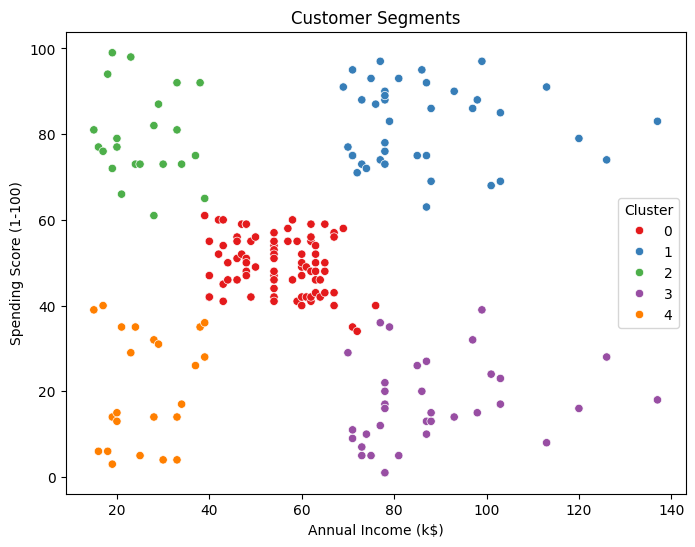

✅ Model evaluation metrics saved to 'cluster_evaluation.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("/content/Mall_Customers.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia_values = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    inertia_values.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_model.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For k')

plt.tight_layout()
plt.show()

optimal_clusters = 5
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()

evaluation_df = pd.DataFrame({
    'k': cluster_range,
    'Inertia': inertia_values,
    'Silhouette Score': silhouette_scores
})

evaluation_df.to_csv('cluster_evaluation.csv', index=False)

print("✅ Model evaluation metrics saved to 'cluster_evaluation.csv'")
